# Pengumpulan Data

In [1]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

import nltk
import string
import re
from sklearn.metrics.pairwise import cosine_similarity
from nltk.util import ngrams

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [7]:
df = pd.read_csv('rev_Sentiment_IKN.csv', sep=';')
df['Tweet']

0       b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...
1       b'RT @Usuludin321: Bener juga yah kenapa sih m...
2       b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...
3       b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...
4       b'RT @Kimi58486332: IKN lebih penting dari ent...
                              ...                        
1800    b'RT @HukumDan: Wuiih. Serius ini kek nya pind...
1801    b'Progres IKN Pada Tahap Awal,Pembiayaan Masih...
1802    b'APLN Garap Kawasan Hunian Super Premium Deka...
1803    b'RT @HukumDan: Wuiih. Serius ini kek nya pind...
1804    b'RT @BergetarNusa: @maryshelparaiso Arek Jawa...
Name: Tweet, Length: 1805, dtype: object

In [8]:
df

,No.,Sentimen,Tweet
0,1,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...
1,2,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...
2,3,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...
3,4,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...
4,5,Negatif,b'RT @Kimi58486332: IKN lebih penting dari ent...
...,...,...,...
1800,1801,Negatif,b'RT @HukumDan: Wuiih. Serius ini kek nya pind...
1801,1802,Positif,"b'Progres IKN Pada Tahap Awal,Pembiayaan Masih..."
1802,1803,Positif,b'APLN Garap Kawasan Hunian Super Premium Deka...
1803,1804,Negatif,b'RT @HukumDan: Wuiih. Serius ini kek nya pind...


(array([ 667.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1138.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

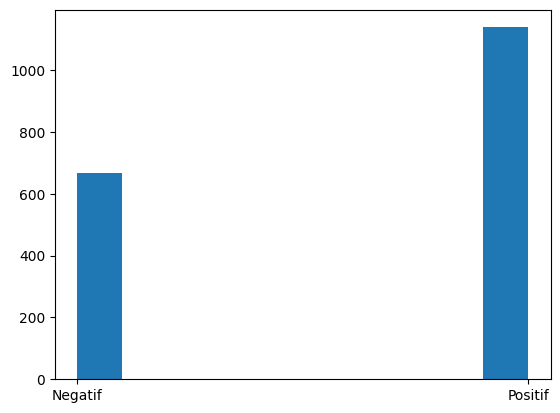

In [9]:
plt.hist(df.Sentimen)

# Pre-Processing

In [10]:
#Cleansing Data
def cleansing(text):
    #Menghilangkan tanda kurung
    text = re.sub('\[.*?\]', '', text)
    #Menghilangkan Tanda Baca
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #Menghilangkan Special Karakter
    text = re.sub('\w*\d\w*', '', text)
    #Menghilangkan Single Character
    text = re.sub('\s+[a-zA-Z]\s+', '', text)
    #Menghilangkan Link
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)
    #Menghilangkan Hashtag
    text = re.sub(r'\B#\S+','', text)
    #Mengganti Multiple Spaces ke Single Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    #Menghilangkan Spaces di awal
    text = text.strip()
    return text
df['CLEANSING']= df['Tweet'].apply(lambda x: cleansing(x))

In [11]:
df.head()

,No.,Sentimen,Tweet,CLEANSING
0,1,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...
1,2,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...
2,3,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...
3,4,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...
4,5,Negatif,b'RT @Kimi58486332: IKN lebih penting dari ent...,bRT IKN lebih penting dari entaskan Kemiskinan...


In [12]:
df.to_excel("Cleansing.xlsx")

In [13]:
#CaseFolding
def case_folding(text):
    text = text.lower()
    return text
df['CASEFOLDING']= df['CLEANSING'].apply(lambda x: case_folding(x))
df.head()

,No.,Sentimen,Tweet,CLEANSING,CASEFOLDING
0,1,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...,bprathumryan pranjayabaguz buset miliar usd ka...
1,2,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...,brt bener juga yah kenapa sih maksain bangun i...
2,3,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...,brt msaiddidu pddk yg sebagian besar adalah as...
3,4,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...,brt hendryanalubis dia pasti mendukung sapa yg...
4,5,Negatif,b'RT @Kimi58486332: IKN lebih penting dari ent...,bRT IKN lebih penting dari entaskan Kemiskinan...,brt ikn lebih penting dari entaskan kemiskinan...


In [14]:
df

,No.,Sentimen,Tweet,CLEANSING,CASEFOLDING
0,1,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...,bprathumryan pranjayabaguz buset miliar usd ka...
1,2,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...,brt bener juga yah kenapa sih maksain bangun i...
2,3,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...,brt msaiddidu pddk yg sebagian besar adalah as...
3,4,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...,brt hendryanalubis dia pasti mendukung sapa yg...
4,5,Negatif,b'RT @Kimi58486332: IKN lebih penting dari ent...,bRT IKN lebih penting dari entaskan Kemiskinan...,brt ikn lebih penting dari entaskan kemiskinan...
...,...,...,...,...,...
1800,1801,Negatif,b'RT @HukumDan: Wuiih. Serius ini kek nya pind...,bRT HukumDan Wuiih Serius ini kek nya pindah S...,brt hukumdan wuiih serius ini kek nya pindah s...
1801,1802,Positif,"b'Progres IKN Pada Tahap Awal,Pembiayaan Masih...",bProgres IKN Pada Tahap AwalPembiayaan Masih D...,bprogres ikn pada tahap awalpembiayaan masih d...
1802,1803,Positif,b'APLN Garap Kawasan Hunian Super Premium Deka...,bAPLN Garap Kawasan Hunian Super Premium Dekat...,bapln garap kawasan hunian super premium dekat...
1803,1804,Negatif,b'RT @HukumDan: Wuiih. Serius ini kek nya pind...,bRT HukumDan Wuiih Serius ini kek nya pindah S...,brt hukumdan wuiih serius ini kek nya pindah s...


In [15]:
#Tokenizing
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['TOKENIZATION']= df['CASEFOLDING'].apply(lambda x: tokenization(x))
df.head()

,No.,Sentimen,Tweet,CLEANSING,CASEFOLDING,TOKENIZATION
0,1,Negatif,b'@PrathumRyan @pranjaya_baguz @MightyWar3 Bus...,bPrathumRyan pranjayabaguz Buset Miliar USD ka...,bprathumryan pranjayabaguz buset miliar usd ka...,"[bprathumryan, pranjayabaguz, buset, miliar, u..."
1,2,Negatif,b'RT @Usuludin321: Bener juga yah kenapa sih m...,bRT Bener juga yah kenapa sih maksain bangun I...,brt bener juga yah kenapa sih maksain bangun i...,"[brt, bener, juga, yah, kenapa, sih, maksain, ..."
2,3,Negatif,b'RT @msaid_didu: Pddk 200.000 yg sebagian bes...,bRT msaiddidu Pddk yg sebagian besar adalah AS...,brt msaiddidu pddk yg sebagian besar adalah as...,"[brt, msaiddidu, pddk, yg, sebagian, besar, ad..."
3,4,Negatif,b'RT @HendryanaLubis: @s1lverpegasus Dia pasti...,bRT HendryanaLubis Dia pasti mendukung sapa yg...,brt hendryanalubis dia pasti mendukung sapa yg...,"[brt, hendryanalubis, dia, pasti, mendukung, s..."
4,5,Negatif,b'RT @Kimi58486332: IKN lebih penting dari ent...,bRT IKN lebih penting dari entaskan Kemiskinan...,brt ikn lebih penting dari entaskan kemiskinan...,"[brt, ikn, lebih, penting, dari, entaskan, kem..."


In [18]:
# read txt stopword using pandas
txt_stopword = pd.read_excel("kamus_stopword.xlsx", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords = txt_stopword['stopwords'].values.tolist()

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['STOP REMOVAL'] = df['TOKENIZATION'].apply(stopwords_removal)


print(df['STOP REMOVAL'].head())

0    [bprathumryan, pranjayabaguz, buset, miliar, u...
1         [brt, bener, yah, sih, maksain, bangun, ikn]
2    [brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...
3    [brt, hendryanalubis, pasti, mendukung, sapa, ...
4    [brt, ikn, penting, entaskan, kemiskinan, mas,...
Name: STOP REMOVAL, dtype: object


In [19]:
df.to_excel("StopwordRemoval.xlsx")

In [20]:
#StopwordRemoval
final = pd.DataFrame(df, columns= ['Sentimen', 'STOP REMOVAL'])
final

,Sentimen,STOP REMOVAL
0,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u..."
1,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]"
2,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s..."
3,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ..."
4,Negatif,"[brt, ikn, penting, entaskan, kemiskinan, mas,..."
...,...,...
1800,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda..."
1801,Positif,"[bprogres, ikn, tahap, awalpembiayaan, masih, ..."
1802,Positif,"[bapln, garap, kawasan, hunian, super, premium..."
1803,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda..."


In [21]:
#Stemming
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in final['STOP REMOVAL']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

final['STEMMING'] = final['STOP REMOVAL'].apply(get_stemmed_term)

2160
------------------------
bprathumryan : bprathumryan
pranjayabaguz : pranjayabaguz
buset : buset
miliar : miliar
usd : usd
kalahin : kalahin
anggaran : anggar
militer : militer
brt : brt
bener : bener
yah : yah
sih : sih
maksain : maksain
bangun : bangun
ikn : ikn
msaiddidu : msaiddidu
pddk : pddk
yg : yg
asn : asn
gajinya : gaji
sdh : sdh
habis : habis
utk : utk
cicilan : cicil
rumah : rumah
kendaraan : kendara
biaya : biaya
anak : anak
sekolah : sekolah
shg : shg
hendryanalubis : hendryanalubis
pasti : pasti
mendukung : dukung
sapa : sapa
bisa : bisa
lanjutkan : lanjut
penting : penting
entaskan : entas
kemiskinan : miskin
mas : mas
joko : joko
jokowi : jokowi
menggenaskan : menggenaskan
masse : masse
keuangannewsid : keuangannewsid
presiden : presiden
jalan : jalan
buntu : buntu
dampak : dampak
positifbagi : positifbagi
kemajuan : maju
bangsa : bangsa
gak : gak
demo : demo
bohirnya : bohirnya
memikirkan : pikir
tinggal : tinggal
ibukota : ibukota
biar : biar
representasi : repr

In [22]:
final.head()

,Sentimen,STOP REMOVAL,STEMMING
0,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u..."
1,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]"
2,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,..."
3,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,..."
4,Negatif,"[brt, ikn, penting, entaskan, kemiskinan, mas,...","[brt, ikn, penting, entas, miskin, mas, joko, ..."


In [24]:
kbba = pd.read_excel('kamus_normalisasi.xlsx')

In [25]:
kbba

,Original,Replacement
0,abis,habis
1,ad,ada
2,adlah,adalah
3,adlh,adalah
4,adoh,aduh
...,...,...
1341,yowes,ya sudah
1342,yuk,ayo
1343,yup,iya
1344,ywdh,ya sudah


In [26]:
#Normalisasi

normalizad_word_dict = {}

for index, row in kbba.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

final['NORMALISASI'] = final['STEMMING'].apply(normalized_term)

final['NORMALISASI'].head(10)

0    [bprathumryan, pranjayabaguz, buset, miliar, u...
1         [brt, benar, yah, sih, memaksa, bangun, ikn]
2    [brt, msaiddidu, pddk, yang, asn, yang, gaji, ...
3    [brt, hendryanalubis, pasti, dukung, siapa, ya...
4    [brt, ikn, penting, entas, miskin, mas, joko, ...
5    [brt, msaiddidu, pddk, yang, asn, yang, gaji, ...
6    [brt, msaiddidu, pddk, yang, asn, yang, gaji, ...
7    [brt, keuangannewsid, ikn, presiden, jalan, bu...
8             [ikn, dampak, positifbagi, maju, bangsa]
9    [tidak, demo, bohirnya, pikir, tinggal, ibukot...
Name: NORMALISASI, dtype: object

In [27]:
def fit_normalisasi(text):
    text = np.array(text)
    text = ' '.join(text)

    return text
final['NORMALISASI'] = final['NORMALISASI'].apply(lambda x: fit_normalisasi(x))
final.head()

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI
0,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u...",bprathumryan pranjayabaguz buset miliar usd ka...
1,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]",brt benar yah sih memaksa bangun ikn
2,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,...",brt msaiddidu pddk yang asn yang gaji sudah ha...
3,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,...",brt hendryanalubis pasti dukung siapa yang bis...
4,Negatif,"[brt, ikn, penting, entaskan, kemiskinan, mas,...","[brt, ikn, penting, entas, miskin, mas, joko, ...",brt ikn penting entas miskin mas joko jokowi m...


In [28]:
final.to_excel("Normalisasi.xlsx")

In [29]:
#NORMALISASI NEGASI
def convert_negasi(text):
    text = re.sub("tidak ", 'tidak', text, flags=re.MULTILINE)
    text = re.sub("jangan ", 'jangan', text, flags=re.MULTILINE)
    text = re.sub("belum ", 'belum', text, flags=re.MULTILINE)
    text = re.sub("bukan ", 'bukan', text, flags=re.MULTILINE)
    text = re.sub("tanpa ", 'tanpa', text, flags=re.MULTILINE)
    text = re.sub("bukanlah ", 'bukanlah', text, flags=re.MULTILINE)
    text = re.sub("tak ", 'tak', text, flags=re.MULTILINE)
    text = re.sub("anti ", 'anti', text, flags=re.MULTILINE)
    return text
final['NORMALISASI']= final['NORMALISASI'].apply(lambda x: convert_negasi(x))
final

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI
0,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u...",bprathumryan pranjayabaguz buset miliar usd ka...
1,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]",brt benar yah sih memaksa bangun ikn
2,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,...",brt msaiddidu pddk yang asn yang gaji sudah ha...
3,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,...",brt hendryanalubis pasti dukung siapa yang bis...
4,Negatif,"[brt, ikn, penting, entaskan, kemiskinan, mas,...","[brt, ikn, penting, entas, miskin, mas, joko, ...",brt ikn penting entas miskin mas joko jokowi m...
...,...,...,...,...
1800,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda...","[brt, hukumdan, wuiih, serius, kek, nya, pinda...",brt hukumdan wuiih serius seperti nya pindah a...
1801,Positif,"[bprogres, ikn, tahap, awalpembiayaan, masih, ...","[bprogres, ikn, tahap, awalpembiayaan, masih, ...",bprogres ikn tahap awalpembiayaan masih sokong...
1802,Positif,"[bapln, garap, kawasan, hunian, super, premium...","[bapln, garap, kawasan, huni, super, premium, ...",bapln garap kawasan huni super premium ikn minat
1803,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda...","[brt, hukumdan, wuiih, serius, kek, nya, pinda...",brt hukumdan wuiih serius seperti nya pindah a...


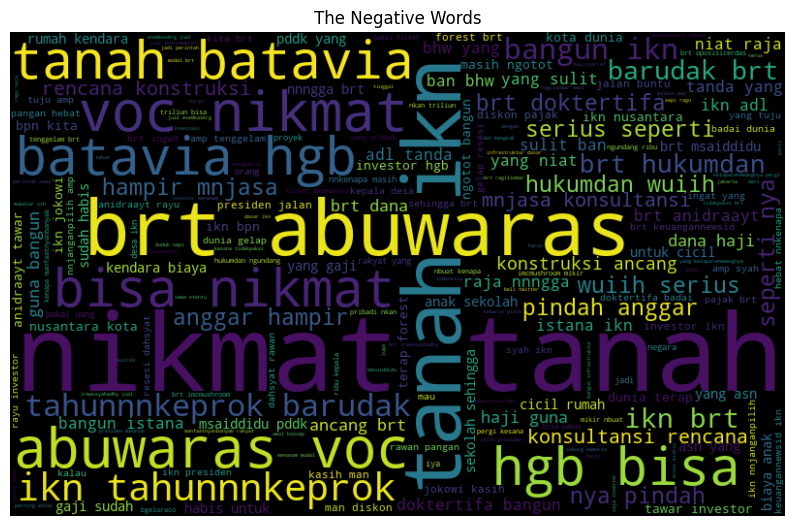

In [30]:
from wordcloud import WordCloud


negative_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Negatif']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

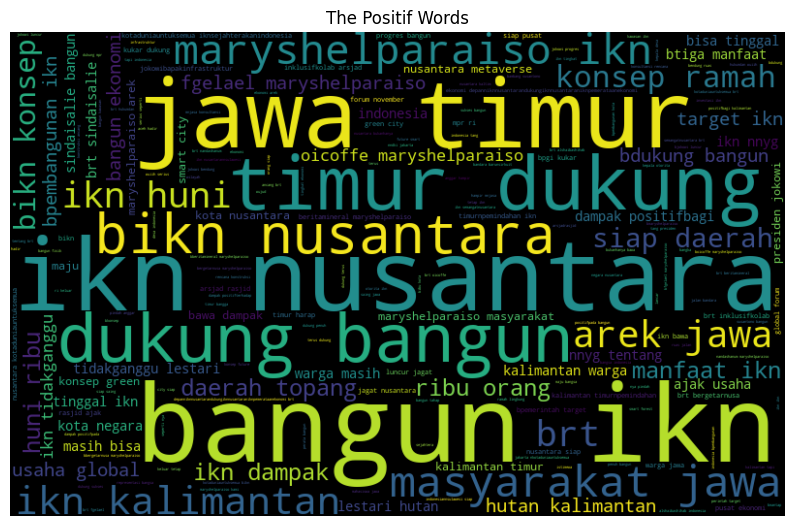

In [31]:
from wordcloud import WordCloud

positif_words =' '.join([text for text in final['NORMALISASI'][final['Sentimen'] == 'Positif']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positif_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positif Words')
plt.show()

In [32]:
#Merubah Sentimen ke Polarity
#Konversi Sentimen Ke Polaritas
def convert(polarity):
    if polarity == 'Positif':
        return 1
    else:
        return -1

In [33]:
final['Polarity'] = final['Sentimen'].apply(convert)
final

,Sentimen,STOP REMOVAL,STEMMING,NORMALISASI,Polarity
0,Negatif,"[bprathumryan, pranjayabaguz, buset, miliar, u...","[bprathumryan, pranjayabaguz, buset, miliar, u...",bprathumryan pranjayabaguz buset miliar usd ka...,-1
1,Negatif,"[brt, bener, yah, sih, maksain, bangun, ikn]","[brt, bener, yah, sih, maksain, bangun, ikn]",brt benar yah sih memaksa bangun ikn,-1
2,Negatif,"[brt, msaiddidu, pddk, yg, asn, yg, gajinya, s...","[brt, msaiddidu, pddk, yg, asn, yg, gaji, sdh,...",brt msaiddidu pddk yang asn yang gaji sudah ha...,-1
3,Negatif,"[brt, hendryanalubis, pasti, mendukung, sapa, ...","[brt, hendryanalubis, pasti, dukung, sapa, yg,...",brt hendryanalubis pasti dukung siapa yang bis...,-1
4,Negatif,"[brt, ikn, penting, entaskan, kemiskinan, mas,...","[brt, ikn, penting, entas, miskin, mas, joko, ...",brt ikn penting entas miskin mas joko jokowi m...,-1
...,...,...,...,...,...
1800,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda...","[brt, hukumdan, wuiih, serius, kek, nya, pinda...",brt hukumdan wuiih serius seperti nya pindah a...,-1
1801,Positif,"[bprogres, ikn, tahap, awalpembiayaan, masih, ...","[bprogres, ikn, tahap, awalpembiayaan, masih, ...",bprogres ikn tahap awalpembiayaan masih sokong...,1
1802,Positif,"[bapln, garap, kawasan, hunian, super, premium...","[bapln, garap, kawasan, huni, super, premium, ...",bapln garap kawasan huni super premium ikn minat,1
1803,Negatif,"[brt, hukumdan, wuiih, serius, kek, nya, pinda...","[brt, hukumdan, wuiih, serius, kek, nya, pinda...",brt hukumdan wuiih serius seperti nya pindah a...,-1


In [34]:
final.to_excel("Setelah Pre-Processing.xlsx")

In [35]:
#Split Data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(final['NORMALISASI'],final['Polarity'], test_size=0.1, random_state=30)
#print(X_Test)

In [36]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# Pembobotan TF_IDF

In [37]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(final['NORMALISASI'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [38]:
Train_X_Tfidf.shape

(1624, 1922)

In [39]:
Train_Y.shape

(1624,)

In [40]:
print(Train_X_Tfidf)

  (0, 1880)	0.18427957815195678
  (0, 1835)	0.5974443039467415
  (0, 1824)	0.2240752939710312
  (0, 1561)	0.2240752939710312
  (0, 1512)	0.2240752939710312
  (0, 1475)	0.15157036126410606
  (0, 1331)	0.2240752939710312
  (0, 1255)	0.2240752939710312
  (0, 1210)	0.2240752939710312
  (0, 1201)	0.21243579324927406
  (0, 1049)	0.2240752939710312
  (0, 761)	0.038210144149672914
  (0, 384)	0.049739192480720285
  (0, 190)	0.21243579324927406
  (0, 167)	0.2240752939710312
  (0, 17)	0.21243579324927406
  (0, 13)	0.21243579324927406
  (1, 1890)	0.2594627642902468
  (1, 1692)	0.5088109598660265
  (1, 1687)	0.2601226435080071
  (1, 1249)	0.5189255285804936
  (1, 761)	0.0891507070846
  (1, 730)	0.24425509227402561
  (1, 384)	0.11604992020191558
  (1, 261)	0.22972948338819899
  :	:
  (1620, 518)	0.30003268484079204
  (1620, 384)	0.06659986113298488
  (1620, 340)	0.28444760810222663
  (1621, 1633)	0.422218718653823
  (1621, 1293)	0.24961010573334297
  (1621, 806)	0.5894402509157739
  (1621, 804)	0.34

In [41]:
print(Test_X_Tfidf)

  (0, 1704)	0.4418325874564945
  (0, 986)	0.4046210507775959
  (0, 834)	0.37738953807598263
  (0, 761)	0.11138382673191942
  (0, 730)	0.3051693897438382
  (0, 384)	0.14499138174817805
  (0, 368)	0.4525297492846667
  (0, 56)	0.40902630528728534
  (1, 1890)	0.2594627642902468
  (1, 1692)	0.5088109598660265
  (1, 1687)	0.2601226435080071
  (1, 1249)	0.5189255285804936
  (1, 761)	0.0891507070846
  (1, 730)	0.24425509227402561
  (1, 384)	0.11604992020191558
  (1, 261)	0.22972948338819899
  (1, 148)	0.2601226435080071
  (1, 139)	0.2601226435080071
  (1, 1)	0.2601226435080071
  (2, 761)	0.15508348691684645
  (2, 698)	0.5519916614242666
  (2, 689)	0.5519916614242666
  (2, 534)	0.5093562137071218
  (2, 384)	0.20187642779160575
  (2, 125)	0.2576076066072454
  :	:
  (177, 384)	0.10757422610867765
  (177, 217)	0.41641446830410767
  (177, 125)	0.1372717915788056
  (177, 113)	0.35175525674631786
  (178, 1369)	0.5128856127850124
  (178, 910)	0.6396252955508829
  (178, 761)	0.1150473485233162
  (178, 

# Metode Klasifikasi SVM

In [42]:
hyperparameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm = SVC()
svm_tuned = GridSearchCV(svm, hyperparameters)

In [43]:
svm_tuned.fit(Train_X_Tfidf, Train_Y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [44]:
svm = SVC(C=1, kernel='linear', degree=3, gamma='scale')
svm.fit(Train_X_Tfidf,Train_Y)

SVC(C=1, kernel='linear')

In [45]:
filename = 'Model_SVM.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [46]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Test_X_Tfidf, Test_Y)
print(result)

0.9447513812154696


# Evaluasi

In [47]:
# HASIL AKURASI, RECALL, PRECISSION, F1 SCORE

predict_test = svm.predict(Test_X_Tfidf)

print("SVM Accuracy Score = ", accuracy_score(predict_test, Test_Y)*100)
print("SVM Precision Score = ", recall_score(predict_test, Test_Y)*100)
print("SVM Recall Score = ", precision_score(predict_test, Test_Y)*100)
print("SVM f1 Score = ", f1_score(predict_test, Test_Y)*100)

SVM Accuracy Score =  94.47513812154696
SVM Precision Score =  98.01980198019803
SVM Recall Score =  92.5233644859813
SVM f1 Score =  95.1923076923077


In [48]:
report = classification_report(Test_Y, predict_test)
print(report) # print classification_report

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        74
           1       0.98      0.93      0.95       107

    accuracy                           0.94       181
   macro avg       0.94      0.95      0.94       181
weighted avg       0.95      0.94      0.95       181



In [49]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                         normalize=False,
                         title=None,
                         cmap=plt.cm.Blues):

    """
    This functions
    normalize=True
    """

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        title = 'Confusion matrix, without normalization'

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=classes, yticklabels=classes,
          title=title,
          ylabel='True label',
          xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    fmt= '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")
            fig.tight_layout()
            return ax

    np.set_printoptions(precision=2)

[[72  2]
 [ 8 99]]


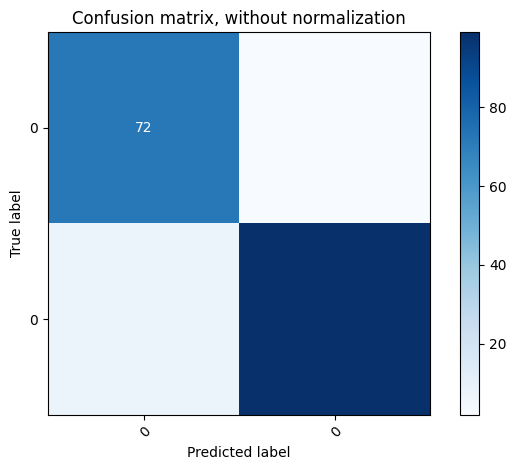

In [50]:
class_names = Test_Y
plot_confusion_matrix(Test_Y, predict_test, classes=class_names,
                     title='Confusion matrix, without normalization')
plt.show()

In [51]:
print('CONFUSION MATRIX')
print('[TP  FN]')
print('[FP  TN]')
confusion_matrix(Test_Y, predict_test, labels=[1, 0])

CONFUSION MATRIX
[TP  FN]
[FP  TN]


array([[99,  8],
       [ 2, 72]], dtype=int64)

In [52]:
# HASIL AKURASI, RECALL, PRECISSION, F1 SCORE DENGAN CONFUSION MATRIX

TP = 87
FN = 6
FP = 0
TN = 107

accuracy = (TP+TN)/(TP+FN+FP+TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2 *precision*recall/(precision+recall)


print("HASIL AKURASI, RECALL, PRECISION, F1 SCORE DENGAN CONFUSION MATRIX \n")

print("SVM Accuracy Score = ", accuracy*100 ,"%")
print("SVM Precision Score = ", precision*100,"%")
print("SVM Recall Score = ", recall*100,"%")
print("SVM f1 Score = ", f1*100,"%")

HASIL AKURASI, RECALL, PRECISION, F1 SCORE DENGAN CONFUSION MATRIX 

SVM Accuracy Score =  97.0 %
SVM Precision Score =  100.0 %
SVM Recall Score =  93.54838709677419 %
SVM f1 Score =  96.66666666666666 %


# Evaluasi Validasi K-Fold Cross Validation

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#10 FOLD
scores_test = cross_val_score(svm, Test_X_Tfidf, Test_Y, cv = 10)
print("Hasil Akurasi menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("Akurasi dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata Akurasi dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil Akurasi menggunakan 10 Fold Cross Validation 

Akurasi dari SVM Iterasi ke - 1   : 100.0
Akurasi dari SVM Iterasi ke - 2   : 88.88888888888889
Akurasi dari SVM Iterasi ke - 3   : 77.77777777777779
Akurasi dari SVM Iterasi ke - 4   : 88.88888888888889
Akurasi dari SVM Iterasi ke - 5   : 83.33333333333334
Akurasi dari SVM Iterasi ke - 6   : 83.33333333333334
Akurasi dari SVM Iterasi ke - 7   : 94.44444444444444
Akurasi dari SVM Iterasi ke - 8   : 94.44444444444444
Akurasi dari SVM Iterasi ke - 9   : 83.33333333333334
Akurasi dari SVM Iterasi ke - 10   : 94.44444444444444

 Rata-Rata Akurasi dari SVM menggunakan Cross Validation : 88.88888888888887


In [55]:
#10 FOLD - Precission

scores_test = cross_val_score(svm_tuned, Test_X_Tfidf, Test_Y, cv = 10, scoring='precision')
scores_test
print("Hasil Presisi menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("Presisi dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata Presisi dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil Presisi menggunakan 10 Fold Cross Validation 

Presisi dari SVM Iterasi ke - 1   : 100.0
Presisi dari SVM Iterasi ke - 2   : 90.0
Presisi dari SVM Iterasi ke - 3   : 76.92307692307693
Presisi dari SVM Iterasi ke - 4   : 83.33333333333334
Presisi dari SVM Iterasi ke - 5   : 100.0
Presisi dari SVM Iterasi ke - 6   : 90.9090909090909
Presisi dari SVM Iterasi ke - 7   : 91.66666666666666
Presisi dari SVM Iterasi ke - 8   : 100.0
Presisi dari SVM Iterasi ke - 9   : 78.57142857142857
Presisi dari SVM Iterasi ke - 10   : 91.66666666666666

 Rata-Rata Presisi dari SVM menggunakan Cross Validation : 90.30702630702632


In [56]:
#10 FOLD - Recall

scores_test = cross_val_score(svm_tuned, Test_X_Tfidf, Test_Y, cv = 10, scoring='recall')
scores_test
print("Hasil Recall menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("Recall dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata Recall dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil Recall menggunakan 10 Fold Cross Validation 

Recall dari SVM Iterasi ke - 1   : 100.0
Recall dari SVM Iterasi ke - 2   : 90.0
Recall dari SVM Iterasi ke - 3   : 100.0
Recall dari SVM Iterasi ke - 4   : 100.0
Recall dari SVM Iterasi ke - 5   : 72.72727272727273
Recall dari SVM Iterasi ke - 6   : 90.9090909090909
Recall dari SVM Iterasi ke - 7   : 100.0
Recall dari SVM Iterasi ke - 8   : 90.9090909090909
Recall dari SVM Iterasi ke - 9   : 100.0
Recall dari SVM Iterasi ke - 10   : 100.0

 Rata-Rata Recall dari SVM menggunakan Cross Validation : 94.45454545454545


In [57]:
#10 FOLD - F1 SCORE

scores_test = cross_val_score(svm_tuned, Test_X_Tfidf, Test_Y, cv = 10, scoring='f1')
scores_test
print("Hasil F1 Score menggunakan 10 Fold Cross Validation \n")
for i in range(10):
    print("F1 Score dari SVM Iterasi ke -", i+1, "  : {0:2}".format(scores_test[i,]*100))
print("\n","Rata-Rata F1 Score dari SVM menggunakan Cross Validation :", scores_test.mean()*100)

Hasil F1 Score menggunakan 10 Fold Cross Validation 

F1 Score dari SVM Iterasi ke - 1   : 100.0
F1 Score dari SVM Iterasi ke - 2   : 90.0
F1 Score dari SVM Iterasi ke - 3   : 86.95652173913044
F1 Score dari SVM Iterasi ke - 4   : 90.9090909090909
F1 Score dari SVM Iterasi ke - 5   : 84.21052631578948
F1 Score dari SVM Iterasi ke - 6   : 90.9090909090909
F1 Score dari SVM Iterasi ke - 7   : 95.65217391304348
F1 Score dari SVM Iterasi ke - 8   : 95.23809523809523
F1 Score dari SVM Iterasi ke - 9   : 88.0
F1 Score dari SVM Iterasi ke - 10   : 95.65217391304348

 Rata-Rata F1 Score dari SVM menggunakan Cross Validation : 91.7527672937284


In [61]:
def classify(tweet):
    pred = svm.predict(Tfidf_vect.transform([tweet]))
    if pred == 1:
        return "Positif"
    return "Negatif"

In [62]:
classify('IKN Memakai APBN Negara')

'Negatif'

In [64]:
classify('Sangat Mendukung Pembangunan IKN')

'Positif'

In [70]:
classify('IKN Kurang Investor')

'Negatif'

In [78]:
classify('Menuju Indonesia Maju')

'Positif'